# **Modeling & Evaluation**

## Objectives

* Answer business requirement 2
  * Deliver an ML system that is capable of predicting whether a cherry leaf is healthy or contains powdery mildew. 

## Inputs

* inputs/cherry_leaves_dataset/cherry_leaves/train
* inputs/cherry_leaves_dataset/cherry_leaves/validation
* inputs/cherry_leaves_dataset/cherry_leaves/test

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file




---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves'

---

# Import packages

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

# Set Data Directory

### Set input directories

In [5]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directories

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


### Set label names

In [7]:
labels = os.listdir(train_path)
print('Labels for the images are',labels)

Labels for the images are ['powdery_mildew', 'healthy']


---

# Set image shape

In [8]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Image distribution in train, test and validation data

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




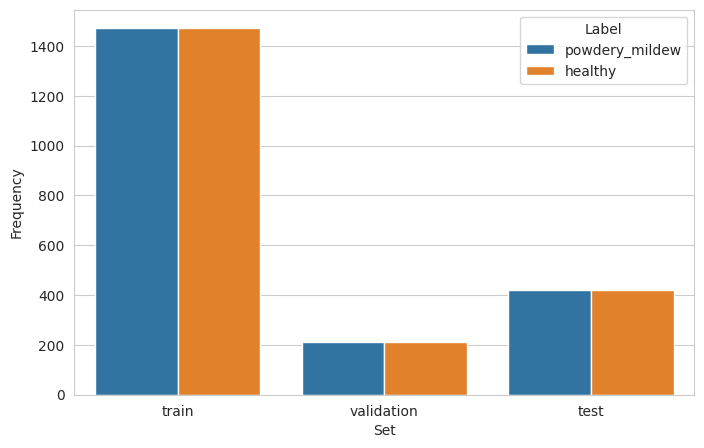

In [9]:
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        folder_path = os.path.join(my_data_dir, folder, label)
        num_images = len(os.listdir(folder_path))
        df_freq = df_freq.append({'Set': folder, 'Label': label, 'Frequency': num_images}, ignore_index=True)
        print(f"* {folder} - {label}: {num_images} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x='Set', y='Frequency', hue='Label', data=df_freq)
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()


---

# Image data augmentation

### Initialize ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Augment training image dataset

In [11]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image dataset

In [12]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment test image dataset

In [13]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented images

===Train Set===
* Image 1: Shape: (20, 256, 256, 3)


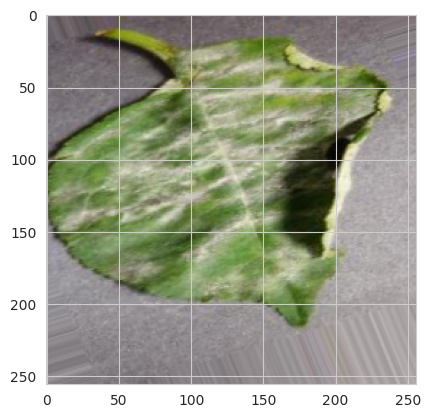

* Image 2: Shape: (20, 256, 256, 3)


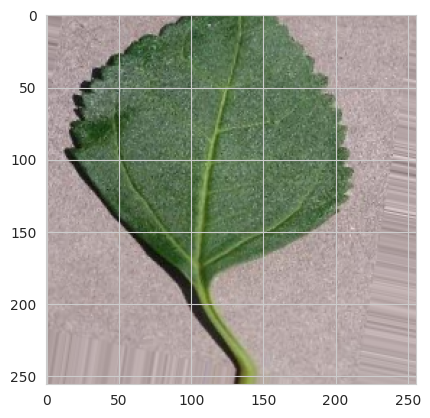

* Image 3: Shape: (20, 256, 256, 3)


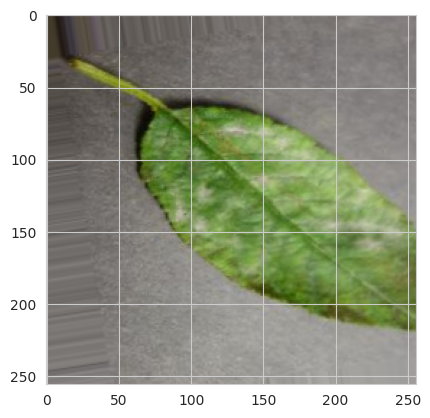

* Image 4: Shape: (20, 256, 256, 3)


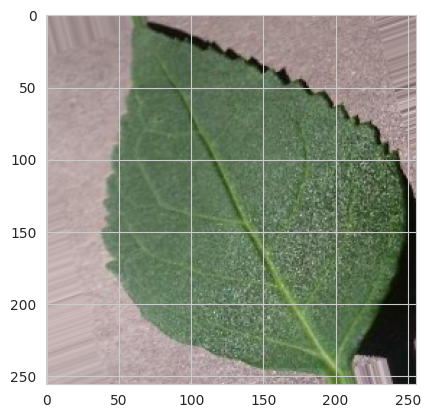

* Image 5: Shape: (20, 256, 256, 3)


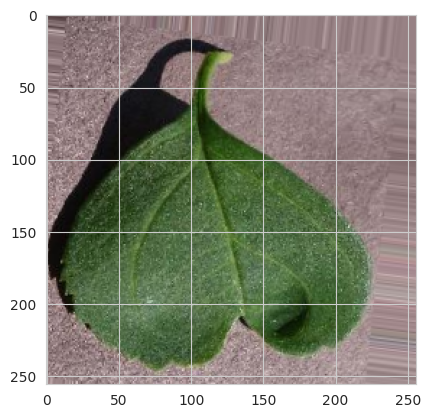

===Validation Set===
* Image 1: Shape: (20, 256, 256, 3)


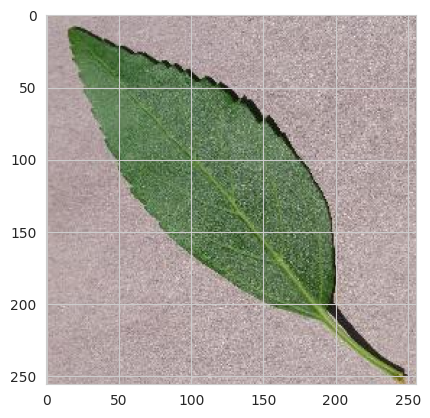

* Image 2: Shape: (20, 256, 256, 3)


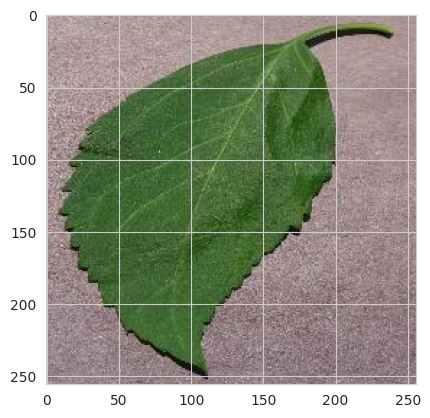

* Image 3: Shape: (20, 256, 256, 3)


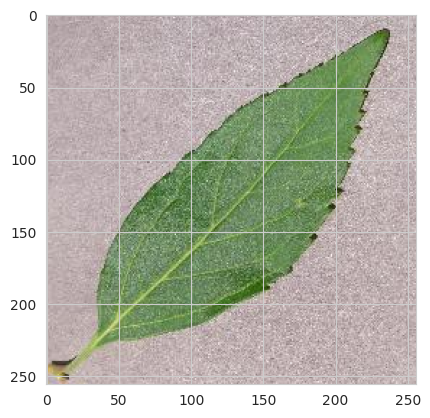

* Image 4: Shape: (20, 256, 256, 3)


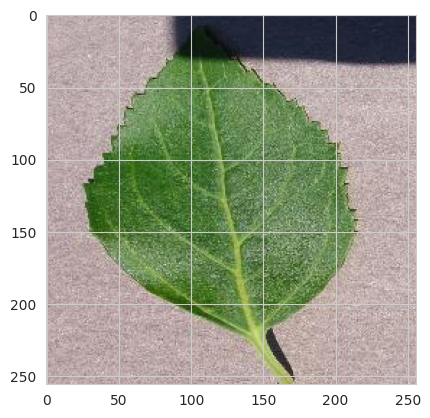

* Image 5: Shape: (20, 256, 256, 3)


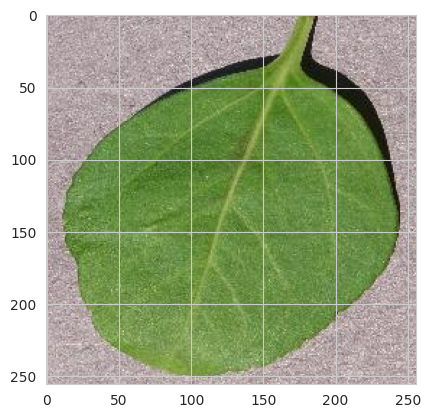

===Test Set===
* Image 1: Shape: (20, 256, 256, 3)


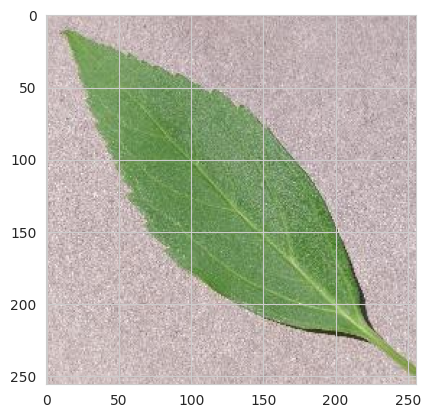

* Image 2: Shape: (20, 256, 256, 3)


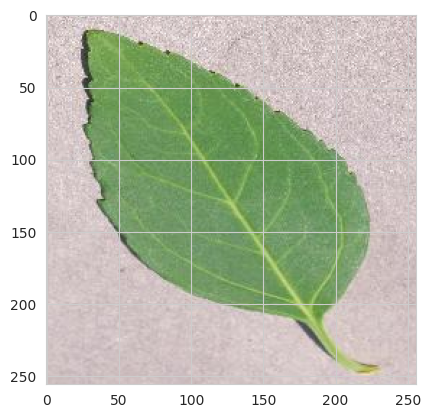

* Image 3: Shape: (20, 256, 256, 3)


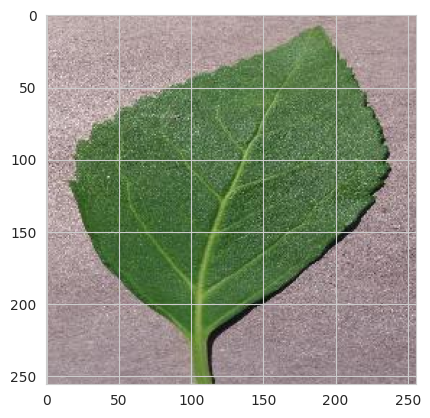

* Image 4: Shape: (20, 256, 256, 3)


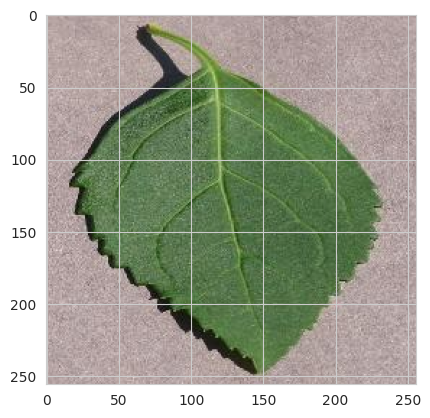

* Image 5: Shape: (20, 256, 256, 3)


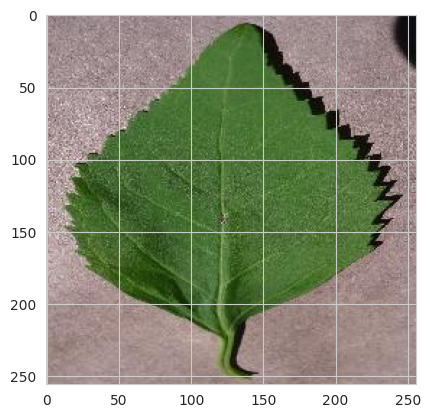

In [14]:
sets = {"Train": train_set, "Validation": validation_set, "Test": test_set}
for name, set in sets.items():
    print(f"==={name} Set===")
    for i in range(5):
        X, y = set.next()
        print(f"* Image {i+1}: Shape: {X.shape}")
        plt.imshow(X[0])
        plt.show()

### Save class indices

In [15]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Creating the Model

### Import ML packages

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [17]:

OUTPUT_DIR = 'outputs/v1'

def create_model():
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=4, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Model summery

In [18]:

model = create_model()
model.summary()


2023-08-11 11:19:44.958229: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 8)       584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0

### Early stopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Fit model for training

In [20]:
model.fit(train_set,
          epochs=15,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data = validation_set,
          callbacks=early_stop,
          verbose=1)

2023-08-11 11:20:16.668657: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
147/147 [==============================] - 126s 576ms/step - loss: 0.3603 - accuracy: 0.8194 - val_loss: 0.1662 - val_accuracy: 0.9667
Epoch 2/15
147/147 [==============================] - 86s 580ms/step - loss: 0.0812 - accuracy: 0.9771 - val_loss: 0.1219 - val_accuracy: 0.9786
Epoch 3/15
147/147 [==============================] - 84s 571ms/step - loss: 0.0503 - accuracy: 0.9877 - val_loss: 0.0286 - val_accuracy: 0.9952
Epoch 4/15
147/147 [==============================] - 82s 556ms/step - loss: 0.0615 - accuracy: 0.9846 - val_loss: 0.0332 - val_accuracy: 0.9905
Epoch 5/15
147/147 [==============================] - 84s 569ms/step - loss: 0.0275 - accuracy: 0.9935 - val_loss: 0.0398 - val_accuracy: 0.9905
Epoch 6/15
147/147 [==============================] - 85s 579ms/step - loss: 0.0359 - accuracy: 0.9918 - val_loss: 0.0743 - val_accuracy: 0.9833


### Save Model

In [21]:
model.save(f"{file_path}/mildew_detector.h5")

---

# Model Performance

Model learning curve

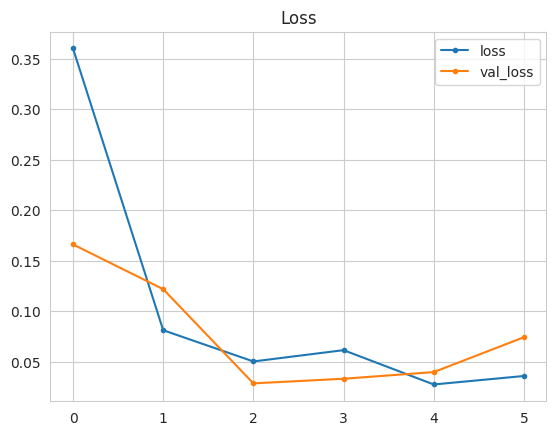

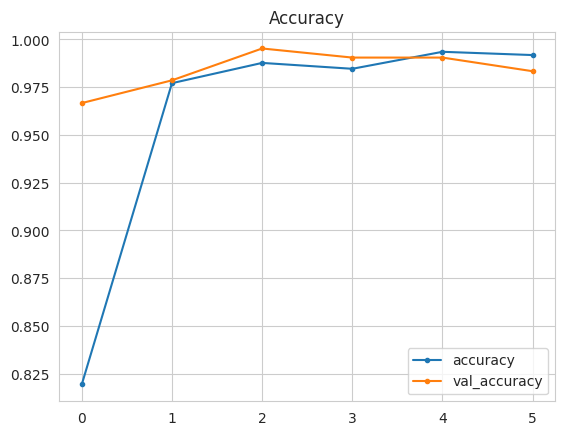

In [22]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()


# Model evaluation

### Load saved model

In [24]:
from keras.models import load_model
model = load_model(f"{file_path}/mildew_detector.h5")

### Evaluating the model on the test set

In [25]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 7s 146ms/step - loss: 0.0447 - accuracy: 0.9929


### Save the evaluation pickle

In [26]:
joblib.dump(value=evaluation, filename=f'{OUTPUT_DIR}/evaluation.pkl')

['outputs/v1/evaluation.pkl']

---


# Predict on new data

Image shape: (256, 256), Image mode: RGB


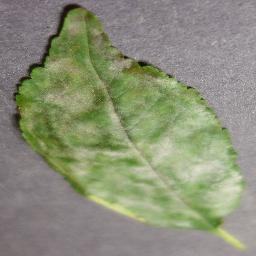

In [27]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[0] # select Uninfected or Parasitized

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert images to array for prediction 

In [28]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


### Probability prediction

In [29]:
prediction_probability = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
predicted_class =  target_map[prediction_probability > 0.5]  

if predicted_class == target_map[0]: prediction_probability = 1 - prediction_probability

print(f'Prediction probability: {prediction_probability}')
print(f'Predicted class: {predicted_class}')

Prediction probability: 0.999982476234436
Predicted class: powdery_mildew


# Conclusion

* Model exceeded business requirement of 97% prediction accuracy.
* Model can accurately predict whether an image can be classified as healthy or containing powdery mildew.